
## Week 3 Lab: Exploratory Data Analysis (EDA) and Introduction to tidymodels

Welcome to the Week 3 Lab Session on Exploratory Data Analysis (EDA) and `tidymodels`. In this lab, we will focus on understanding data through visual and statistical techniques (EDA) and introduce the powerful `tidymodels` framework for building machine learning models in a consistent, flexible manner. By the end of this lab, you will be equipped with the skills to analyze your data more effectively and start building predictive models.

The outline of the material will focus on:

#### 1. Exploratory Data Analysis (EDA)

Exploratory Data Analysis is the critical first step in any data analytics project. It allows us to gain insights into the structure of our data, understand the relationships between variables, and detect anomalies or patterns that could impact modeling.

1. Visualizing Distributions and Relationships
   - Use of histograms, boxplots, scatter plots, and correlation matrices.
2. Understanding the distribution of data
   - Identifying unusual data points and determining whether transformations are needed.
3. Exploring Categorical vs. Numerical Data
   - Summarizing the key characteristics of both categorical and numerical variables.

#### 2. Introduction to tidymodels

In this section, we’ll introduce the `tidymodels` package, a collection of packages for modeling and machine learning within the tidyverse. It provides a cohesive, consistent framework to streamline data preprocessing, model creation, and evaluation.

1. Setting Up a Modeling Workflow
   - Learn how to create reusable and reproducible workflows that include data preprocessing, model training, and validation.
2. Splitting Data into Training and Testing Sets
   - Understand the importance of creating training and testing datasets to prevent overfitting and ensure robust model performance.
3. Building and Evaluating Simple Models
   - Introduction to building basic models such as linear regression, using tidymodels.
4. Cross-Validation and Hyperparameter Tuning
   - Learn how to fine-tune your models using cross-validation techniques to optimize performance.


In [2]:
library(tidyverse)
library(tidymodels)
library(car)
library(ggplot2)
library(visdat)
library(ggthemr)
library(GGally) # library to plot correlation pairs
library(recipes)


ggthemr('dust')

### Exploratory Data Analysis with Chile Dataset

For implementing EDA steps, we will closely follow the guidance from the Exploratory Data Analysis using R textbook and use the dataset Chile. The Chile dataset is from a national survey conducted in April and May of 1988 by FLACSO/Chile. 

We can load the data directly using the R package `car` or read it from the Datasets folder.

In [3]:
# installing and loading the car package
#install.packages("car")
library(car)

data(Chile)  # loading the package
head(Chile)  # peaking into the data

,region,population,sex,age,education,income,statusquo,vote
,<fct>,<int>,<fct>,<int>,<fct>,<int>,<dbl>,<fct>
1,N,175000,M,65,P,35000,1.00820,Y
2,N,175000,M,29,PS,7500,-1.29617,N
3,N,175000,F,38,P,15000,1.23072,Y
4,N,175000,F,49,P,35000,-1.03163,N
5,N,175000,F,23,S,35000,-1.10496,N
6,N,175000,F,28,P,7500,-1.04685,N


Using the `head()` we see a sample of the data. We notice that the data contains varying variables of different data types. Before we go any further, we will first import the tidyverse library and convert the data from data.frame to tibble object.


In [5]:
chile <- as_tibble(Chile)
chile %>% slice_head(n = 10)

region,population,sex,age,education,income,statusquo,vote
<fct>,<int>,<fct>,<int>,<fct>,<int>,<dbl>,<fct>
N,175000,M,65,P,35000,1.00820,Y
N,175000,M,29,PS,7500,-1.29617,N
N,175000,F,38,P,15000,1.23072,Y
N,175000,F,49,P,35000,-1.03163,N
N,175000,F,23,S,35000,-1.10496,N
N,175000,F,28,P,7500,-1.04685,N
N,175000,M,26,PS,35000,-0.78626,N
N,175000,F,24,S,15000,-1.11348,N
N,175000,F,41,P,15000,-1.01292,U


In [6]:
dim(chile)

[1] 2700    8

We now know that we have a total of 2700 observations across 8 variables. 

Another useful question at the basic level is, what are the variable names and are they useful.

In [7]:
names(chile)

[1] "region"     "population" "sex"        "age"        "education" 
[6] "income"     "statusquo"  "vote"

Indeed for this dataset, the variables are meaningful without any intervention. 

### Variable Types

We now have a general sense of the data we are working with as far as the dimensions and attribute names together with peeking through to see some of the sample observation. Next we look at the structure of the dataset.

In [41]:
str(chile)

tibble [2,700 × 8] (S3: tbl_df/tbl/data.frame)
 $ region    : Factor w/ 5 levels "C","M","N","S",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ population: int [1:2700] 175000 175000 175000 175000 175000 175000 175000 175000 175000 175000 ...
 $ sex       : Factor w/ 2 levels "F","M": 2 2 1 1 1 1 2 1 1 2 ...
 $ age       : int [1:2700] 65 29 38 49 23 28 26 24 41 41 ...
 $ education : Factor w/ 3 levels "P","PS","S": 1 2 1 1 3 1 2 3 1 1 ...
 $ income    : int [1:2700] 35000 7500 15000 35000 35000 7500 35000 15000 15000 15000 ...
 $ statusquo : num [1:2700] 1.01 -1.3 1.23 -1.03 -1.1 ...
 $ vote      : Factor w/ 4 levels "A","N","U","Y": 4 2 4 2 2 2 2 2 3 2 ...


The data structure reveals that we have four numeric variables and four ordinal or categorical variables. Before diving into the details of each variable, it’s helpful to first consider the number of unique observations for each one. This initial step can also help identify any missing values that may be present.

#### Checking Unique Values

Checking of unique values can be perfomed at the variable level and the whole dataset level. This may allow us to idenfity rows of duplicates.

In [8]:
n_distinct(chile)

[1] 2691

Out of 2,700 observations, we’ve identified 8 non-unique entries. While these could potentially be duplicates, they might also represent legitimate repeated observations. To further investigate, it's important to examine the distinct values at the variable level. This can help us better understand the nature of these observations. We can achieve this using the following code:

In [9]:
chile %>% summarise( across( everything(), ~n_distinct(.))) 

region,population,sex,age,education,income,statusquo,vote
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5,10,2,54,4,8,2093,5


<br>

Note that the `across()` function which allows us to easily apply an operation across columns. 



### Missing Values

Checking for Missing Values is an important part of fundamental data exploration task. The example below, checks for missing values across all variables.

In [10]:
chile %>% summarise( across( everything(), ~ sum(is.na(.)))) 

region,population,sex,age,education,income,statusquo,vote
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,1,11,98,17,168


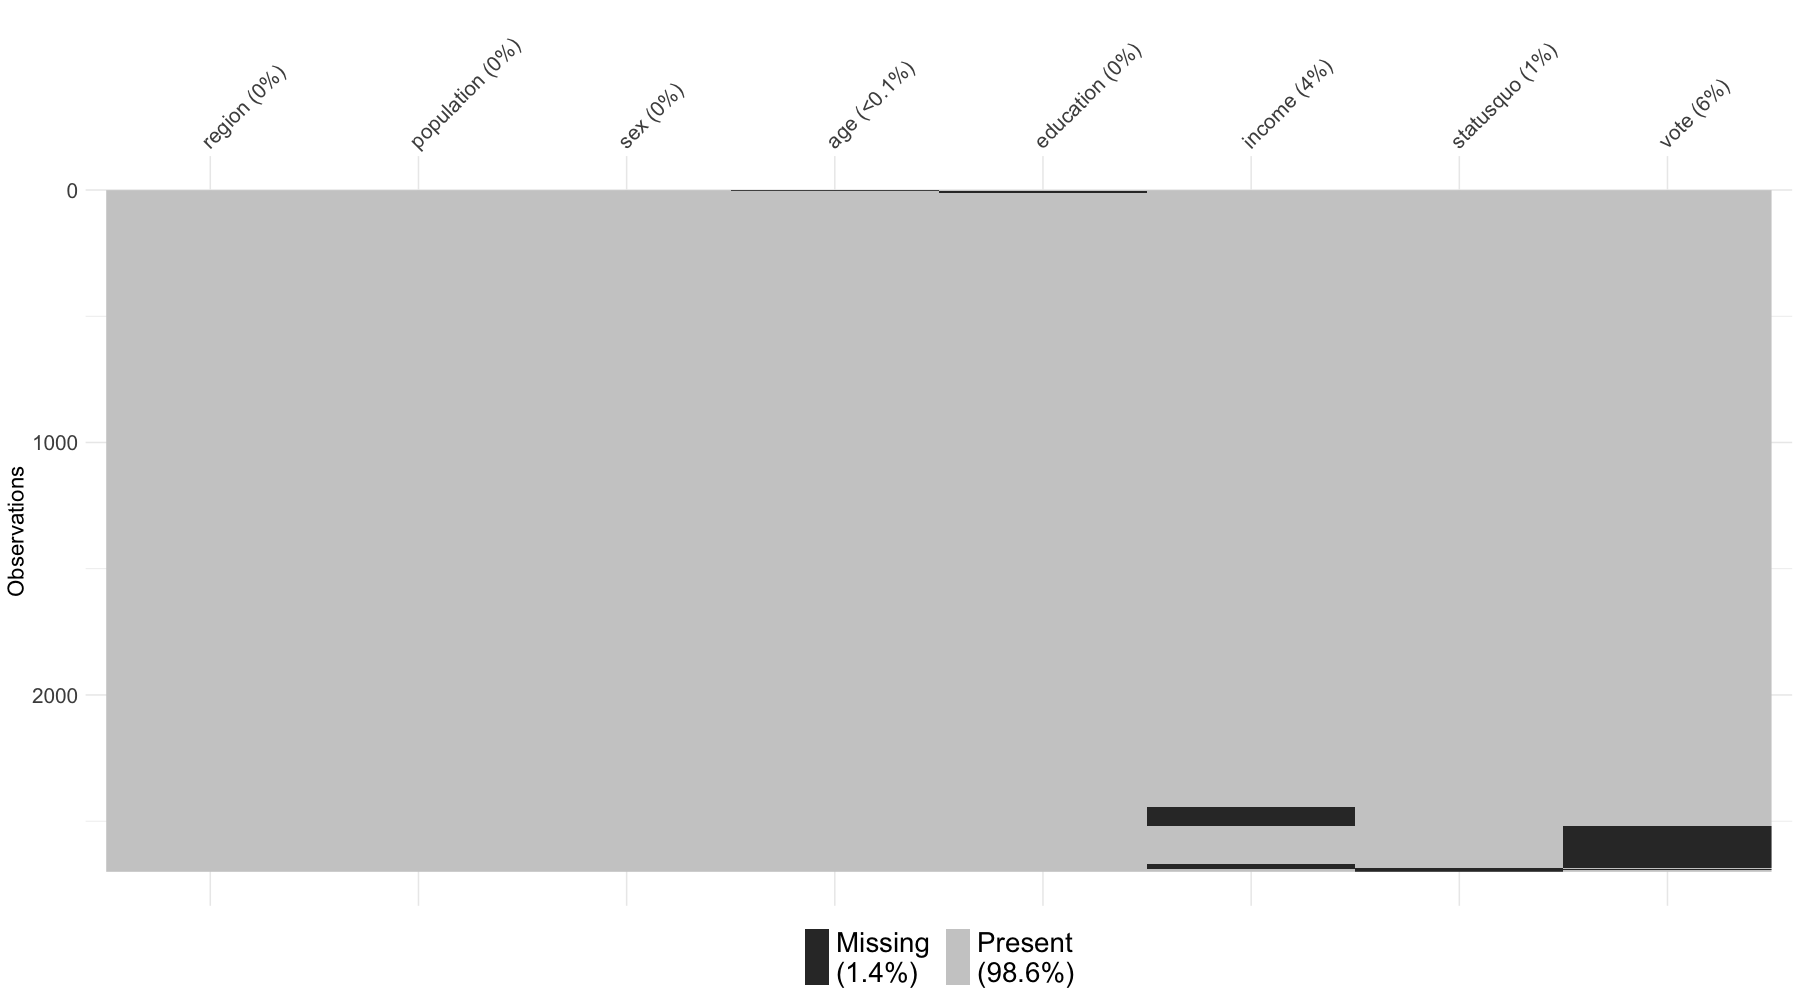

In [11]:
options(repr.plot.width = 18, repr.plot.height = 10, repr.plot.res = 100)

vis_miss(chile, cluster = TRUE) + theme(
    axis.text = element_text(size = 15),    # Increase font size of axis labels
    axis.title = element_text(size = 16),   # Increase font size of axis titles
    plot.title = element_text(size = 18),    # Increase font size of plot title
    legend.text = element_text(size = 20 )    # Increase font size of plot title
  )

Combining the missing value visualization and overall variable count, we notice that there are some missing observations on some columns, with $1.4%$ of the overall data that are missing. 

### Summarizing Numerical Values

Now that we have a sense of what the dataset looks like, we can dig a little deeper into the individual variables. In particular, we can look at the summary statistics.

In [12]:
chile %>% 
    select_if( is.numeric ) %>% 
    summary()

   population          age            income         statusquo       
 Min.   :  3750   Min.   :18.00   Min.   :  2500   Min.   :-1.80301  
 1st Qu.: 25000   1st Qu.:26.00   1st Qu.:  7500   1st Qu.:-1.00223  
 Median :175000   Median :36.00   Median : 15000   Median :-0.04558  
 Mean   :152222   Mean   :38.55   Mean   : 33876   Mean   : 0.00000  
 3rd Qu.:250000   3rd Qu.:49.00   3rd Qu.: 35000   3rd Qu.: 0.96857  
 Max.   :250000   Max.   :70.00   Max.   :200000   Max.   : 2.04859  
                  NA's   :1       NA's   :98       NA's   :17        

Key Observations:

1.	The relationship between the mean and median provides valuable insights into the skewness of the distribution. When the mean and median are close in value, the distribution is likely to be approximately normal. If the median is lower than the mean, the distribution is typically right-skewed (positively skewed), whereas if the median is higher than the mean, the distribution is usually left-skewed (negatively skewed). Understanding this relationship allows us to infer the distribution’s shape even before visualizing the data.

2. We can then use visualization for further confirm and/or evaluate features that have interesting indicators. The example below, plots the distribution of age from the dataset

Warning message:
"Removed 1 row containing non-finite outside the scale range (`stat_bin()`)."


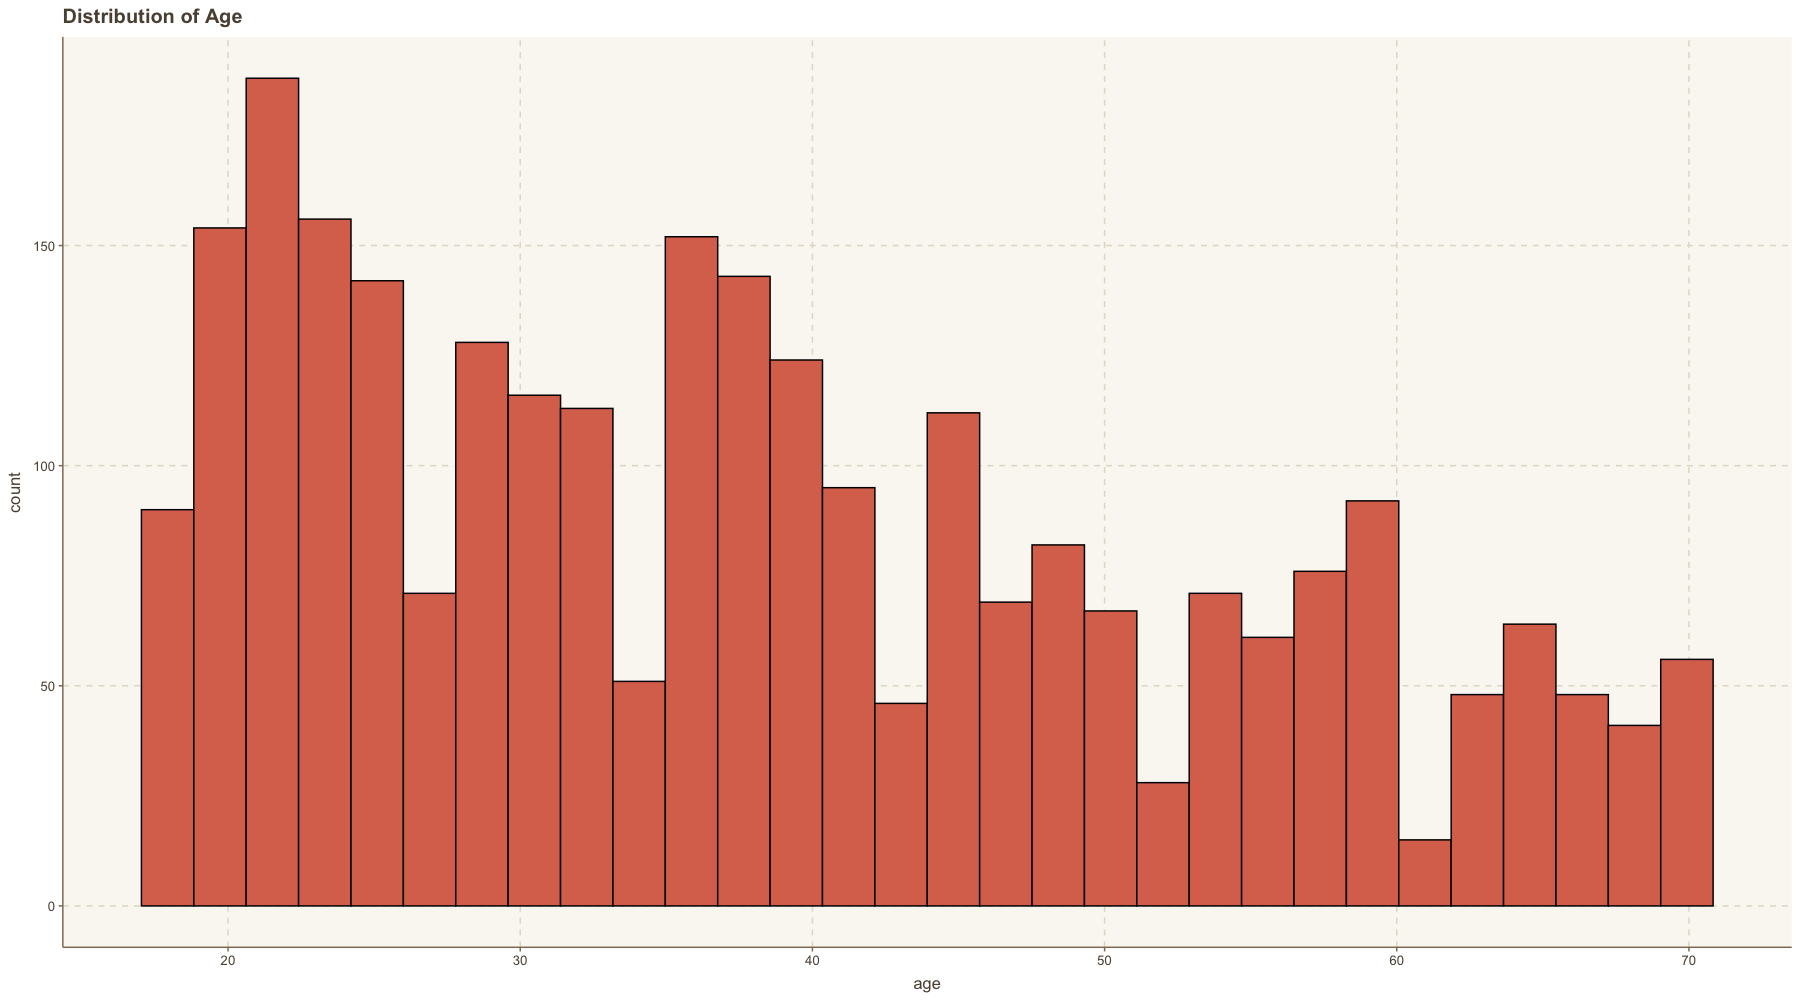

In [13]:
chile %>% 
    select_if( is.numeric ) %>% 
    ggplot(., aes(x = age) ) +
    geom_histogram(color = 'black', bins=30) +
    ggtitle("Distribution of Age")

Warning message:
"Removed 17 rows containing non-finite outside the scale range (`stat_bin()`)."


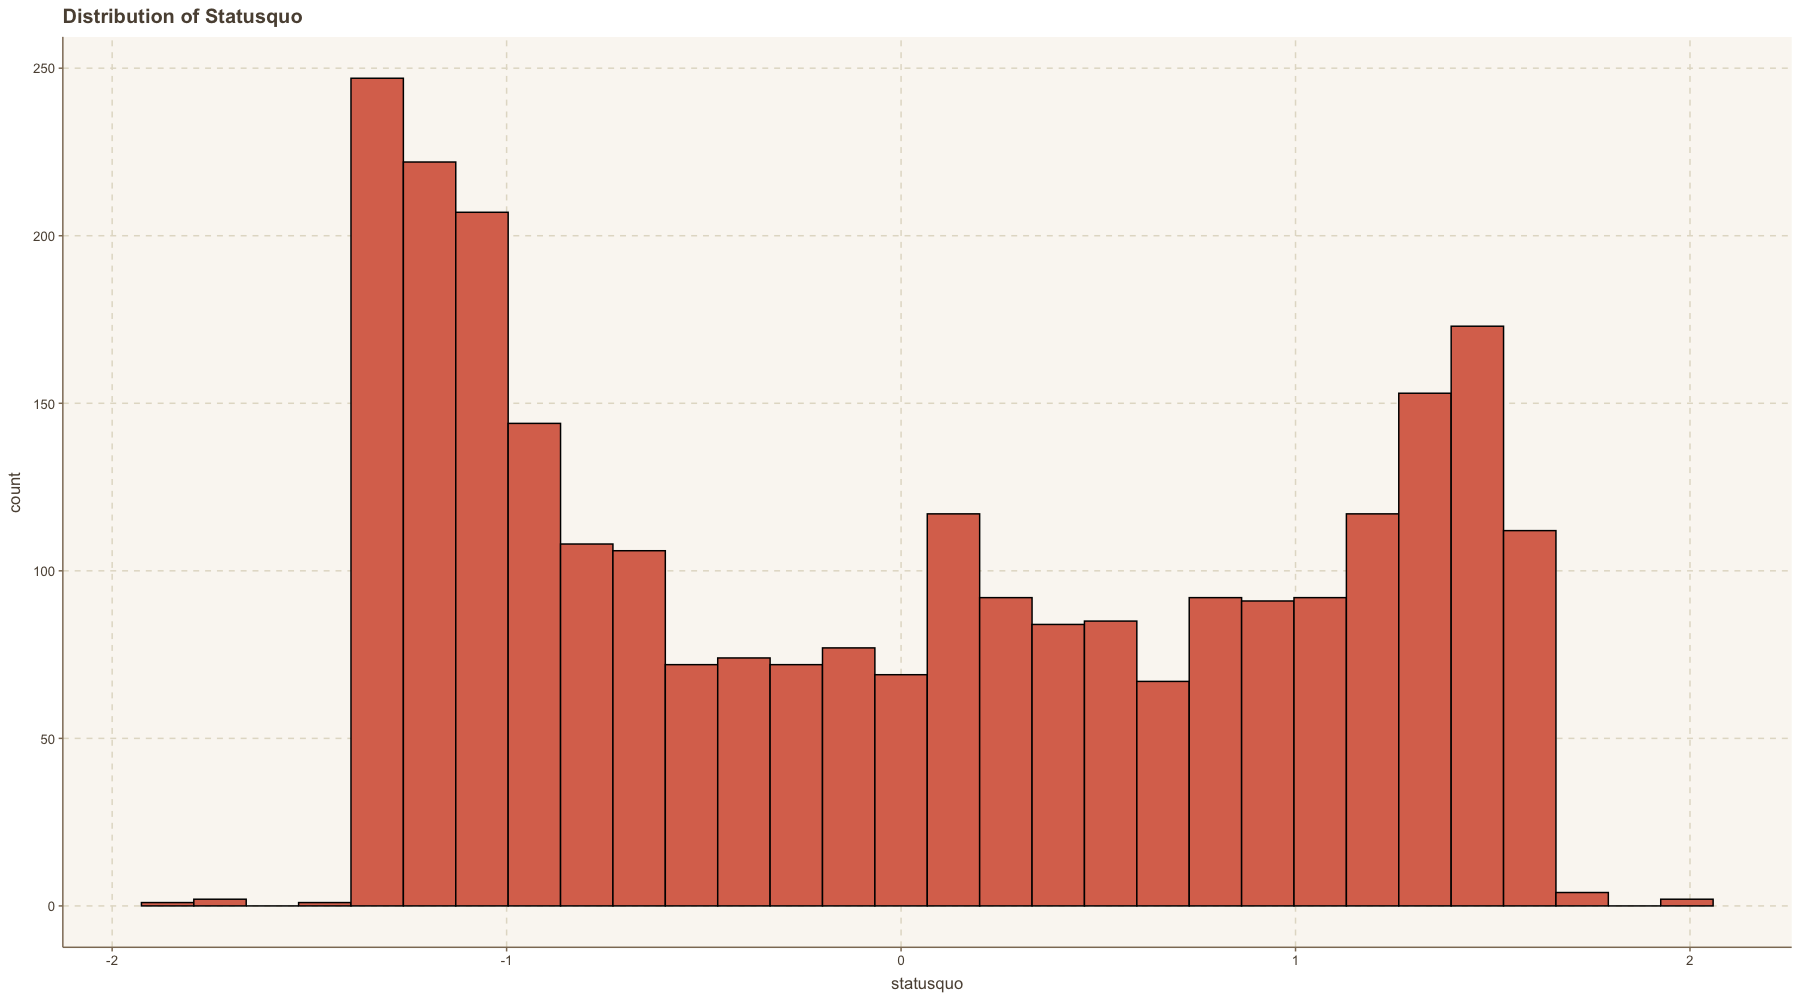

In [14]:
chile %>% 
    select_if( is.numeric ) %>% 
    ggplot(., aes(x = statusquo) ) +
    geom_histogram(color = 'black', bins=30) +
    ggtitle("Distribution of Statusquo")

### Income and Population

Although income and population are numeric variables, they appear to be grouped into specific categories. This could be due to survey reporting, where respondents provided ranges rather than exact values. We can verify this by using the unique() or distinct() functions to examine the unique values in these distributions.

In [15]:
chile %>% select(income, population) %>% summarise( across( everything(), ~n_distinct(.) ) )

income,population
<int>,<int>
8,10


This changes how we approach the visualization of these columns from histogram to barplot.

Warning message:
“Removed 98 rows containing non-finite outside the scale range (`stat_count()`).”


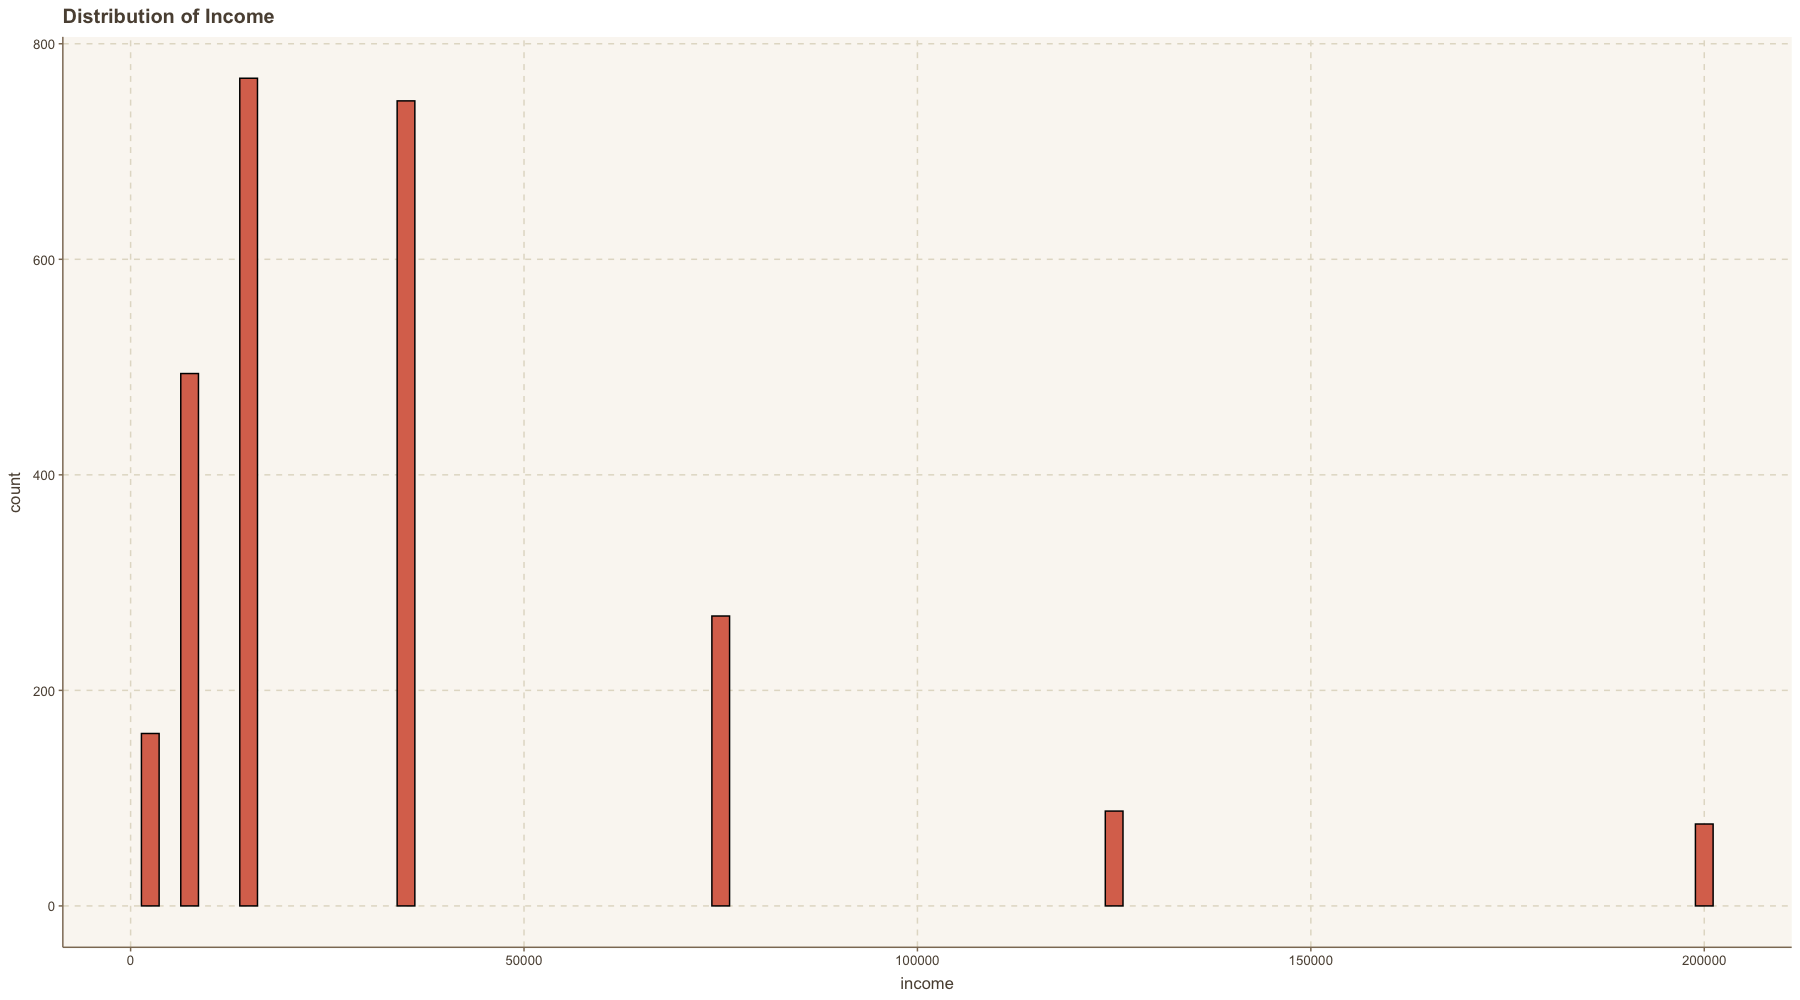

In [15]:
chile %>% 
    select_if( is.numeric ) %>% 
    ggplot(., aes(x = income) ) +
    geom_bar(color = 'black',) +
    ggtitle("Distribution of Income")

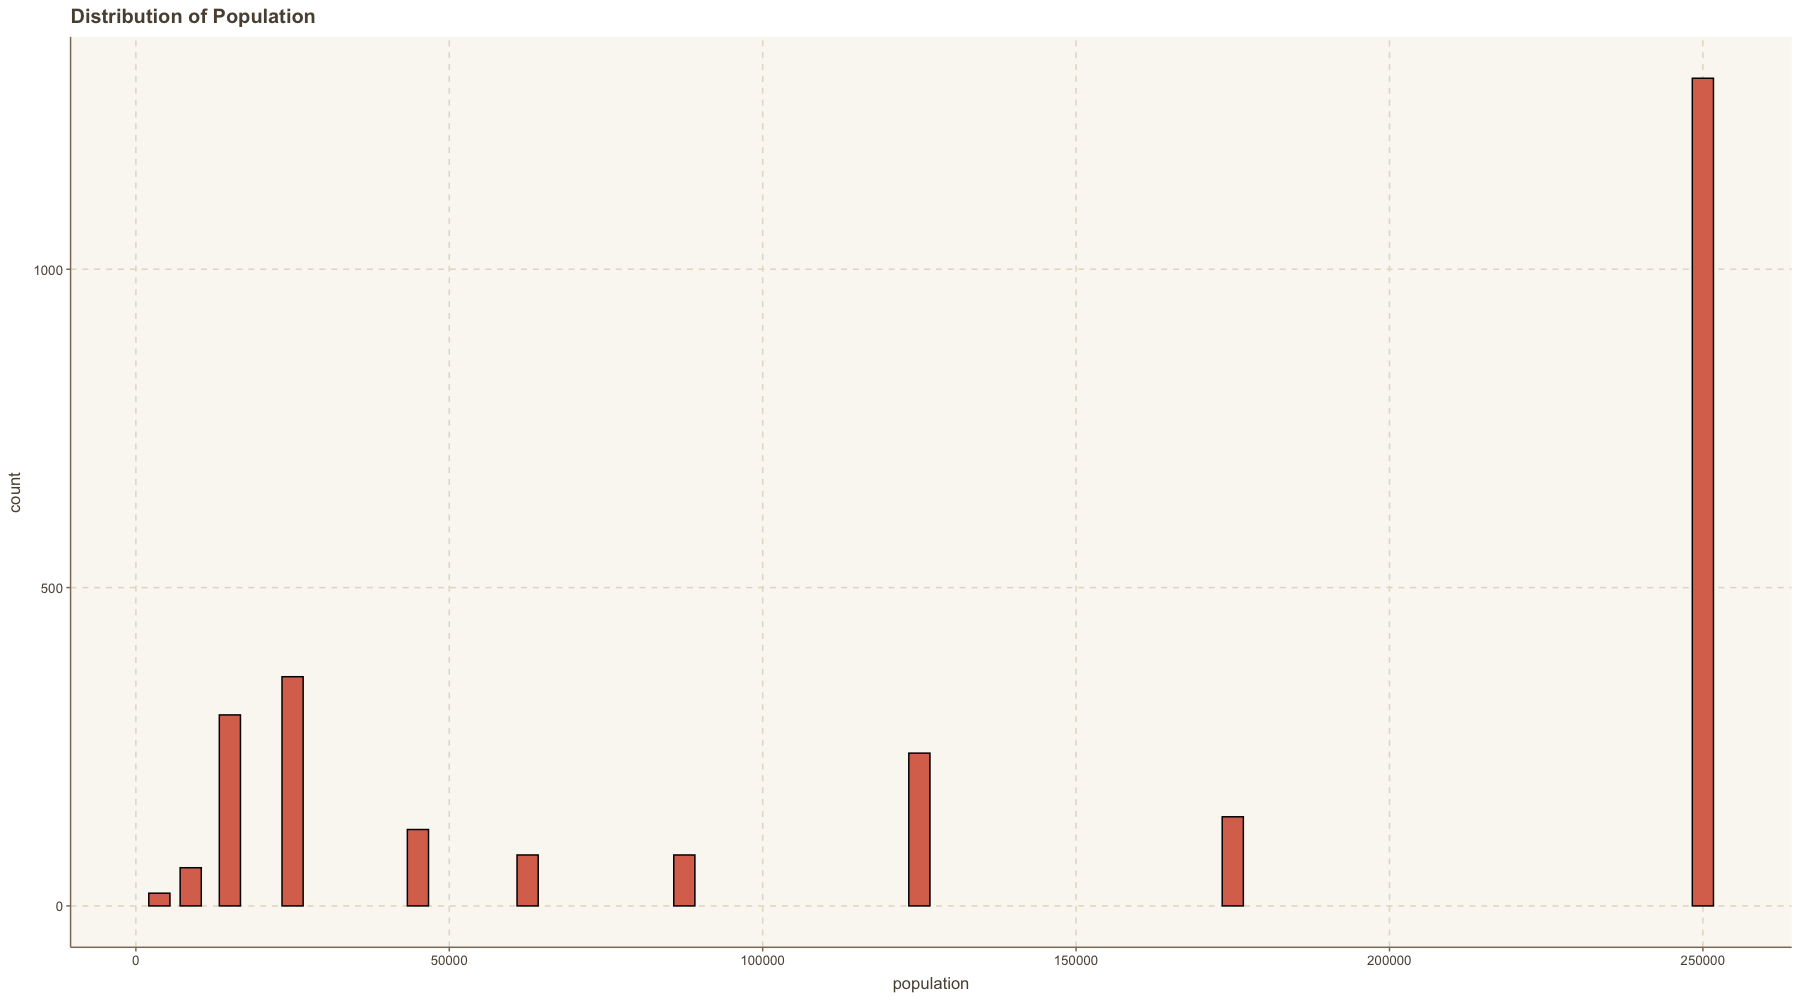

In [16]:
chile %>% 
    select_if( is.numeric ) %>% 
    ggplot(., aes(x = population) ) +
    geom_bar(color = 'black',) +
    ggtitle("Distribution of Population")

### Categorical Variables

We have four categorical variables that can be explored to gain insights into the data's origins. Examining the counts for each category is particularly useful in understanding the distribution within these groups.

In [17]:
chile %>% 
    select_if( ~ !is.numeric(.) ) %>%    # return non-numeric names
    names()                              # return column names

[1] "region"    "sex"       "education" "vote"

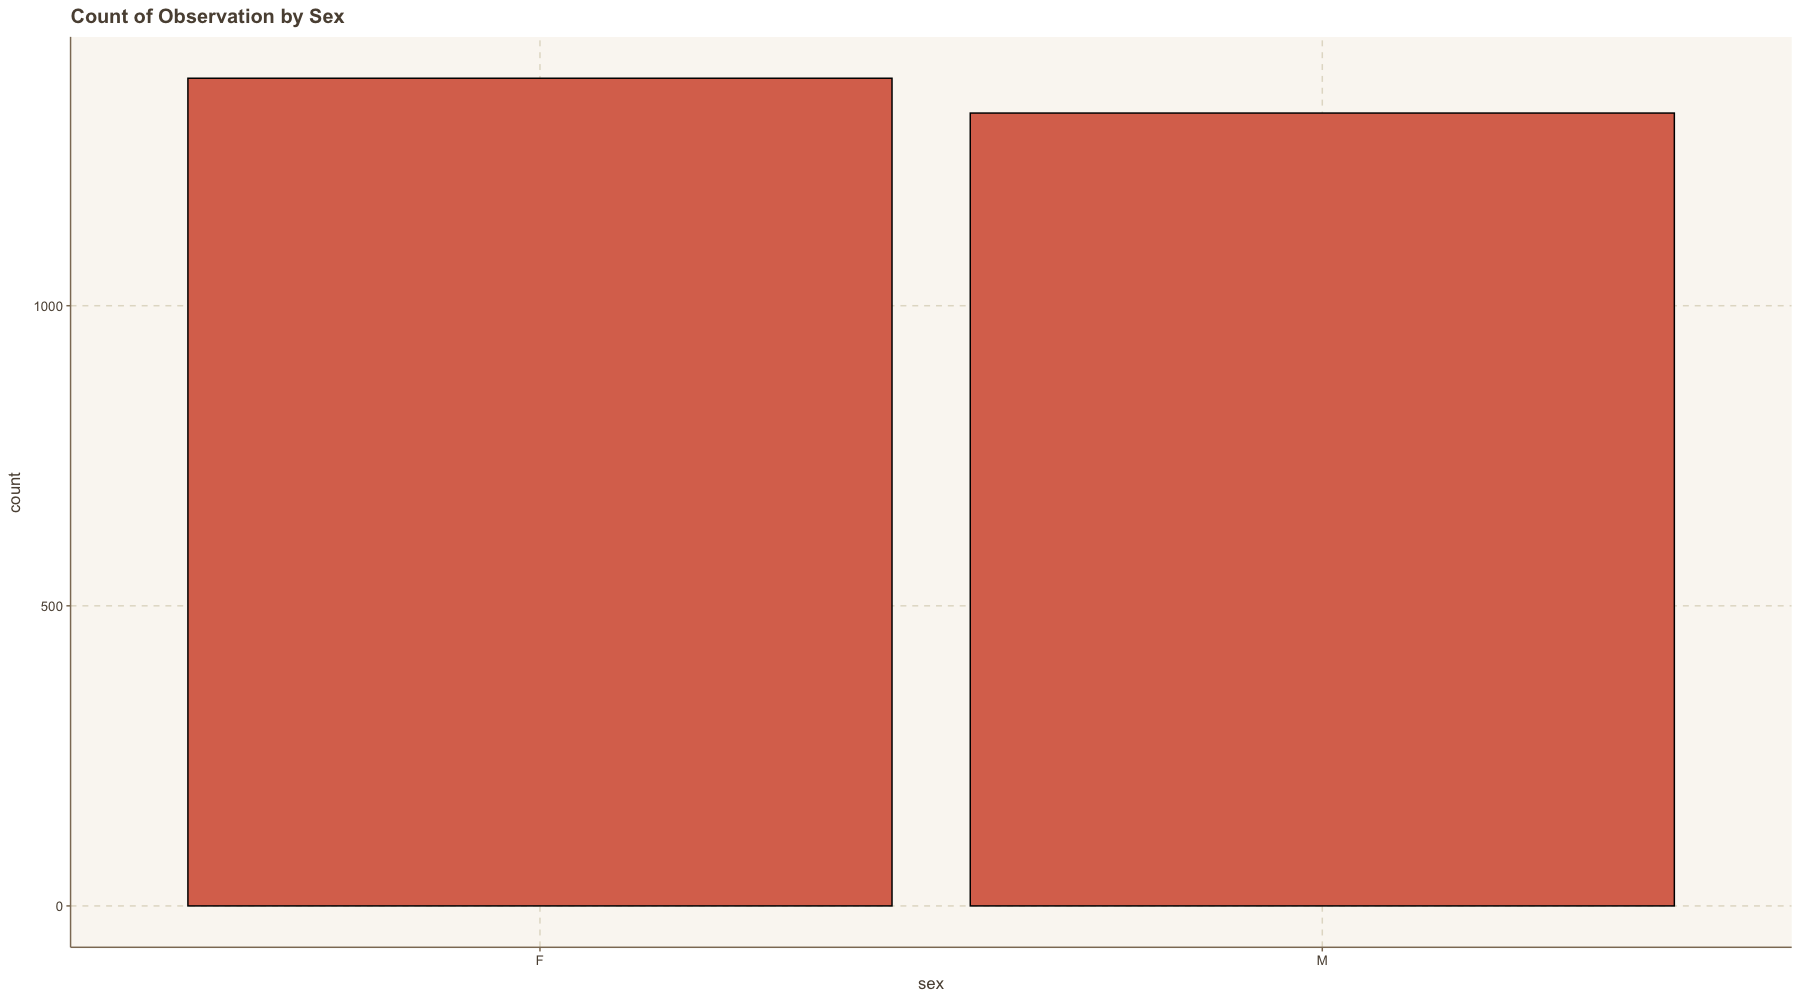

In [18]:
chile %>% 
    select_if( ~ !is.numeric(.) ) %>% 
    ggplot(., aes(x = sex) ) +
    geom_bar(color = 'black',) +
    ggtitle("Count of Observation by Sex")

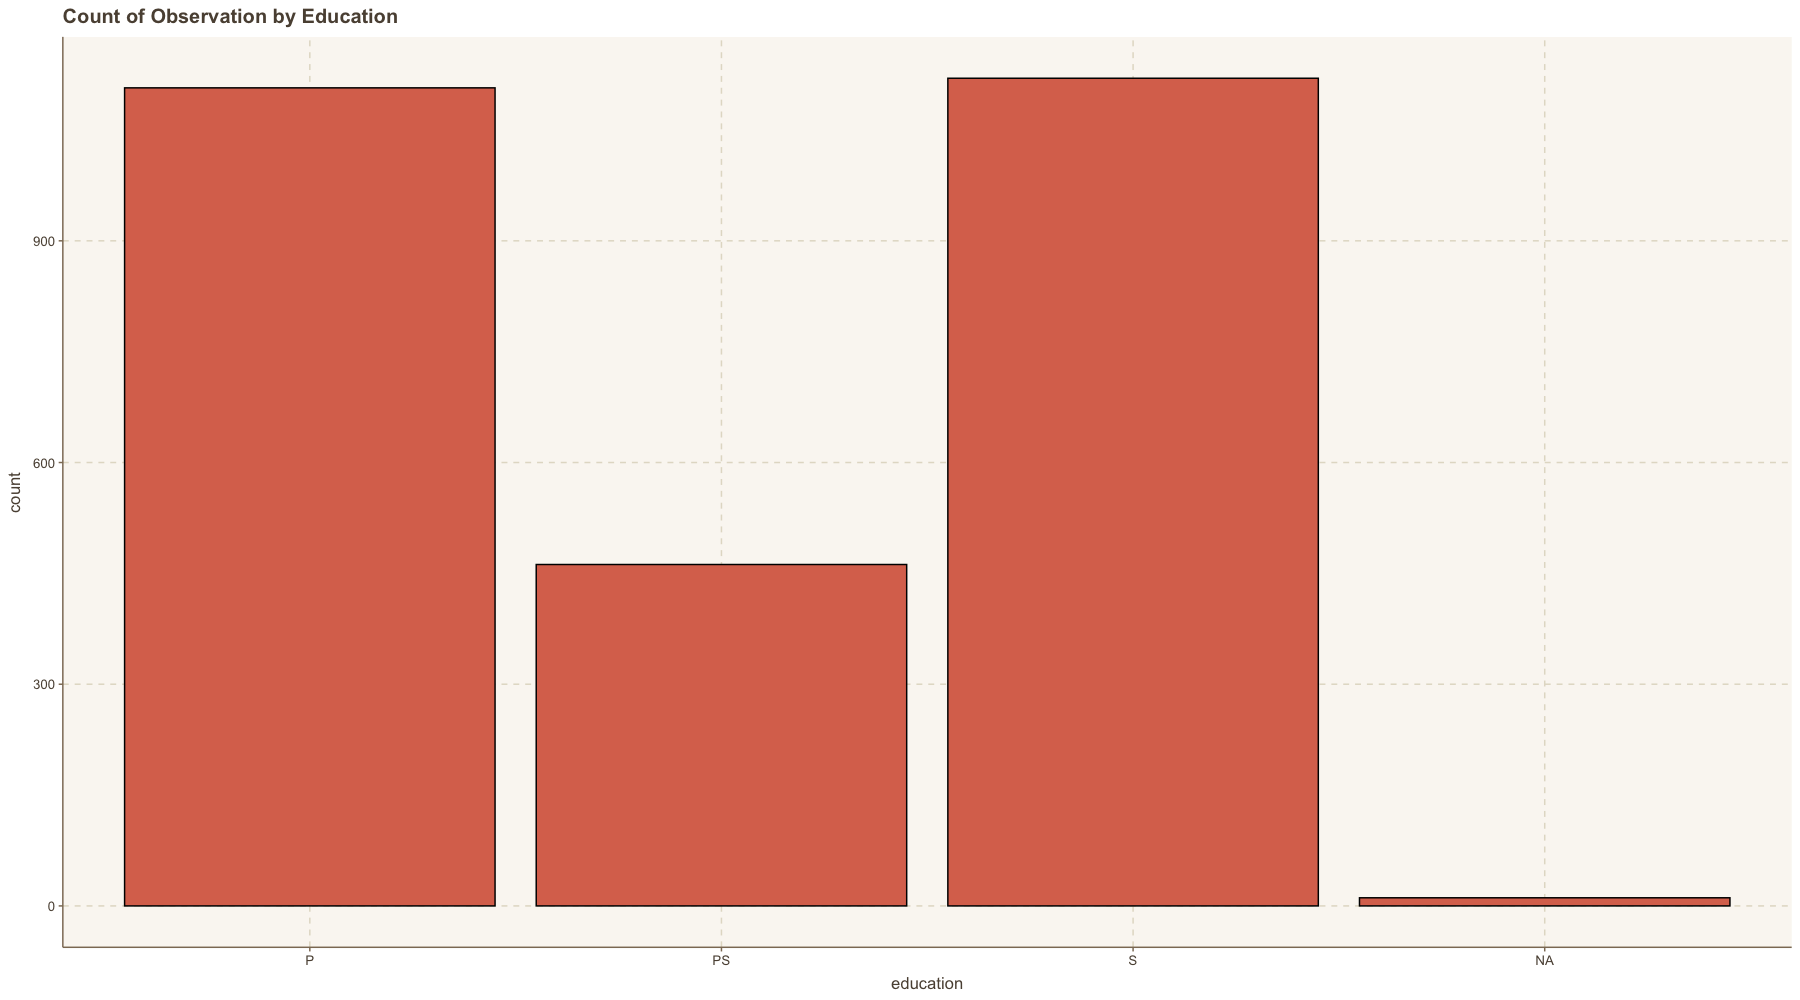

In [19]:
chile %>% 
    select_if( ~ !is.numeric(.) ) %>% 
    ggplot(., aes(x = education) ) +
    geom_bar(color = 'black',) +
    ggtitle("Count of Observation by Education")

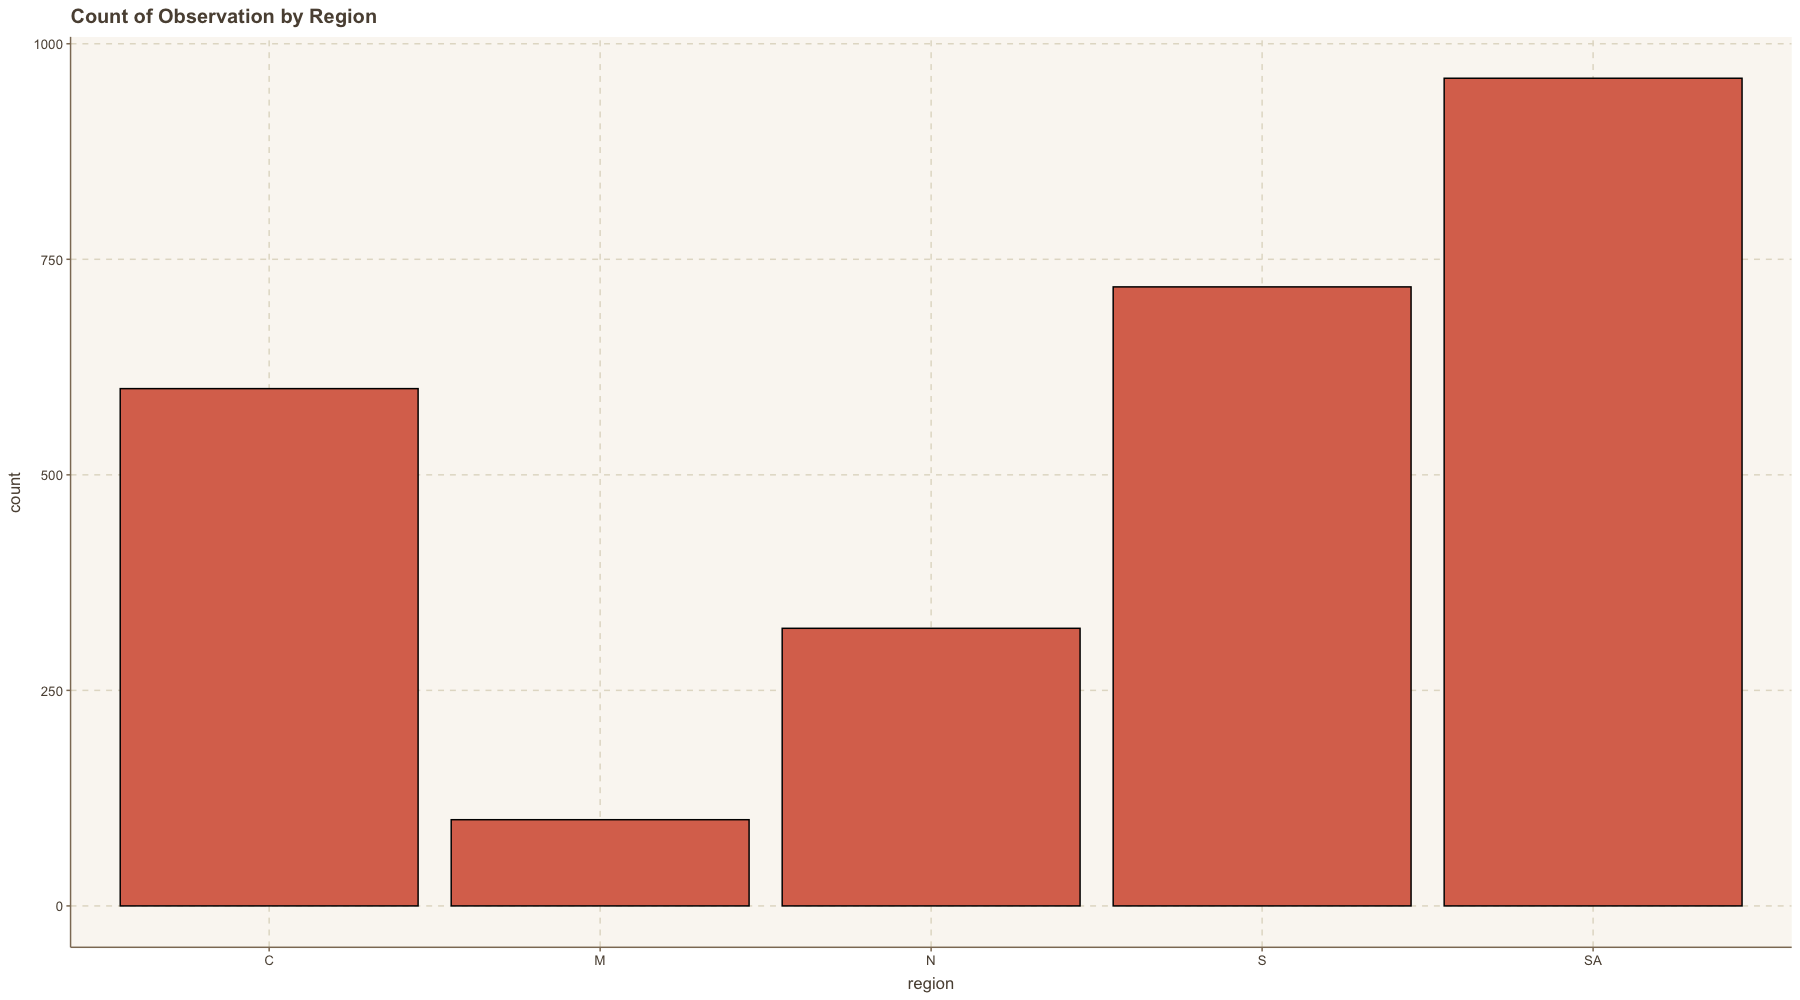

In [20]:
chile %>% 
    select_if( ~ !is.numeric(.) ) %>% 
    ggplot(., aes(x = region) ) +
    geom_bar(color = 'black',) +
    ggtitle("Count of Observation by Region")

We notice a few imbalances on Education and Region observations with some groups representing more of the observation that others. This is often a useful dimension to understand as categorical variables often inform numerical variables. For example, we can now look at income through the lens of education.

Warning message:
"package 'ggridges' was built under R version 4.3.3"
Warning message:
"The `scale_name` argument of `discrete_scale()` is deprecated as of ggplot2
3.5.0."
Picking joint bandwidth of 3940

Warning message:
"Removed 98 rows containing non-finite outside the scale range
(`stat_density_ridges()`)."


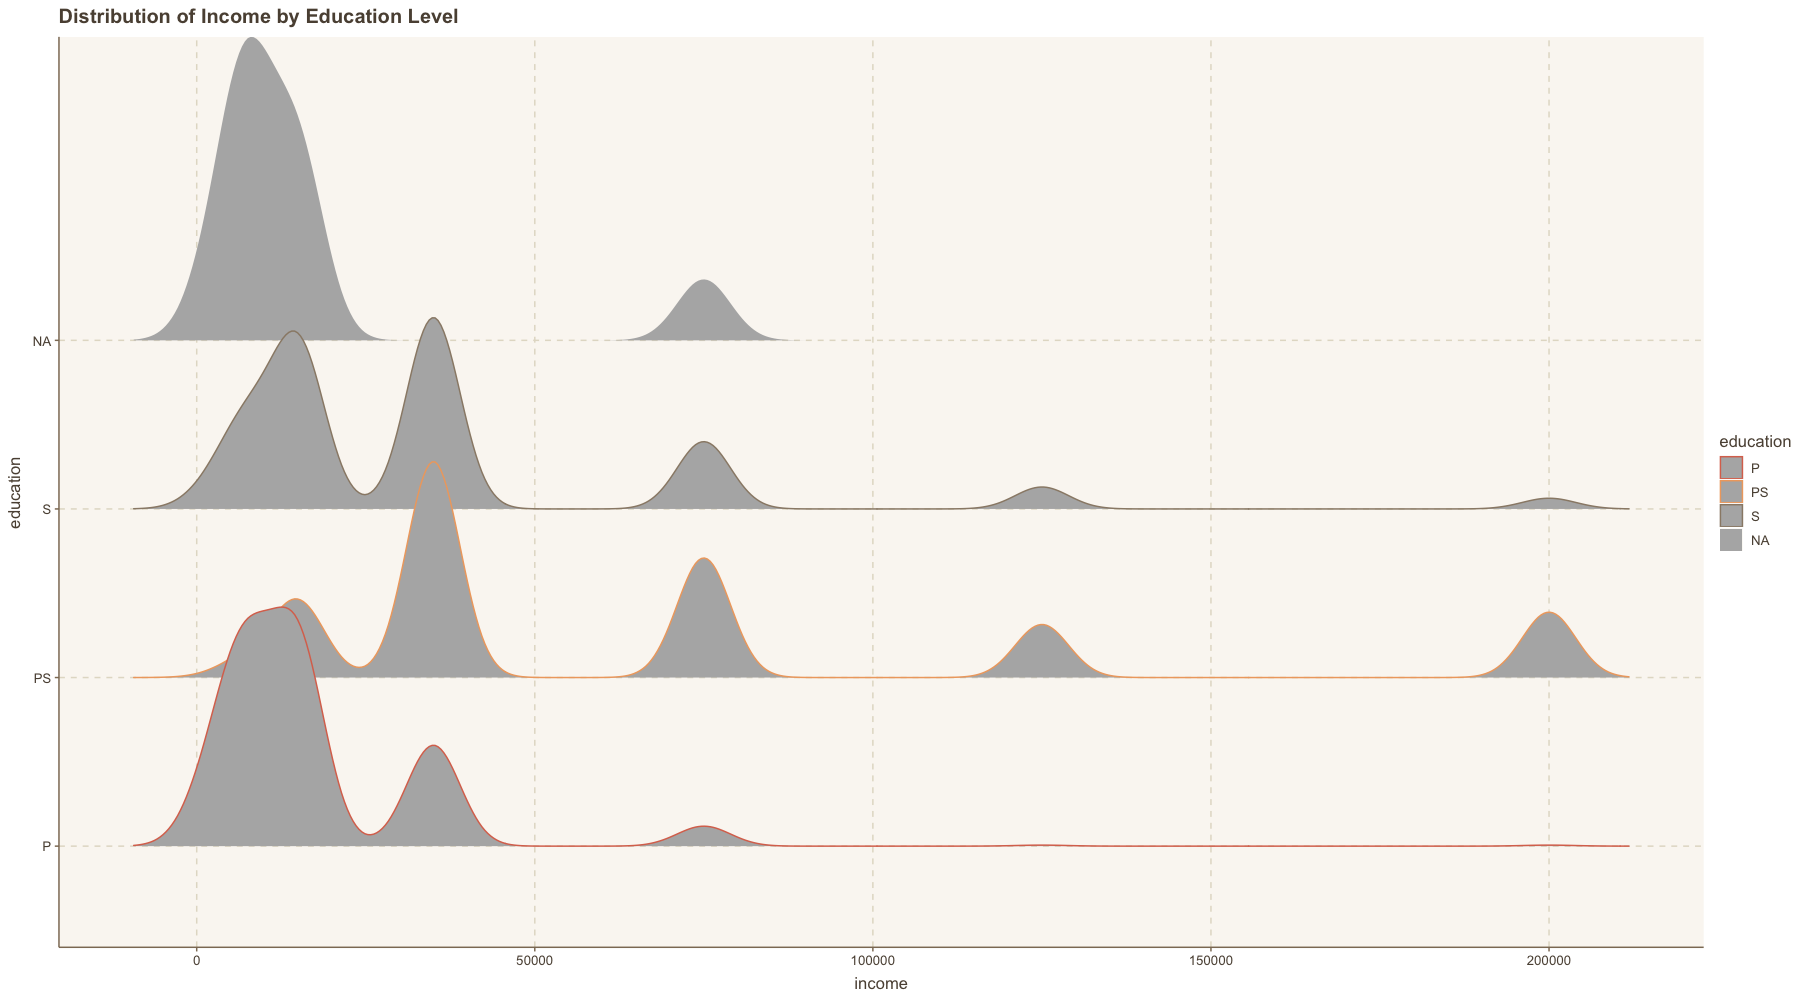

In [21]:
library(ggridges)

chile %>%
    ggplot( aes(x = income, y = education, color = education) ) +
    geom_density_ridges()  +
    ggtitle("Distribution of Income by Education Level")  

We notice here that the education group PS and S have more tendencies to have higher income concentrations than P and those that did not report their education level.

Picking joint bandwidth of 3800

Warning message:
"Removed 98 rows containing non-finite outside the scale range
(`stat_density_ridges()`)."


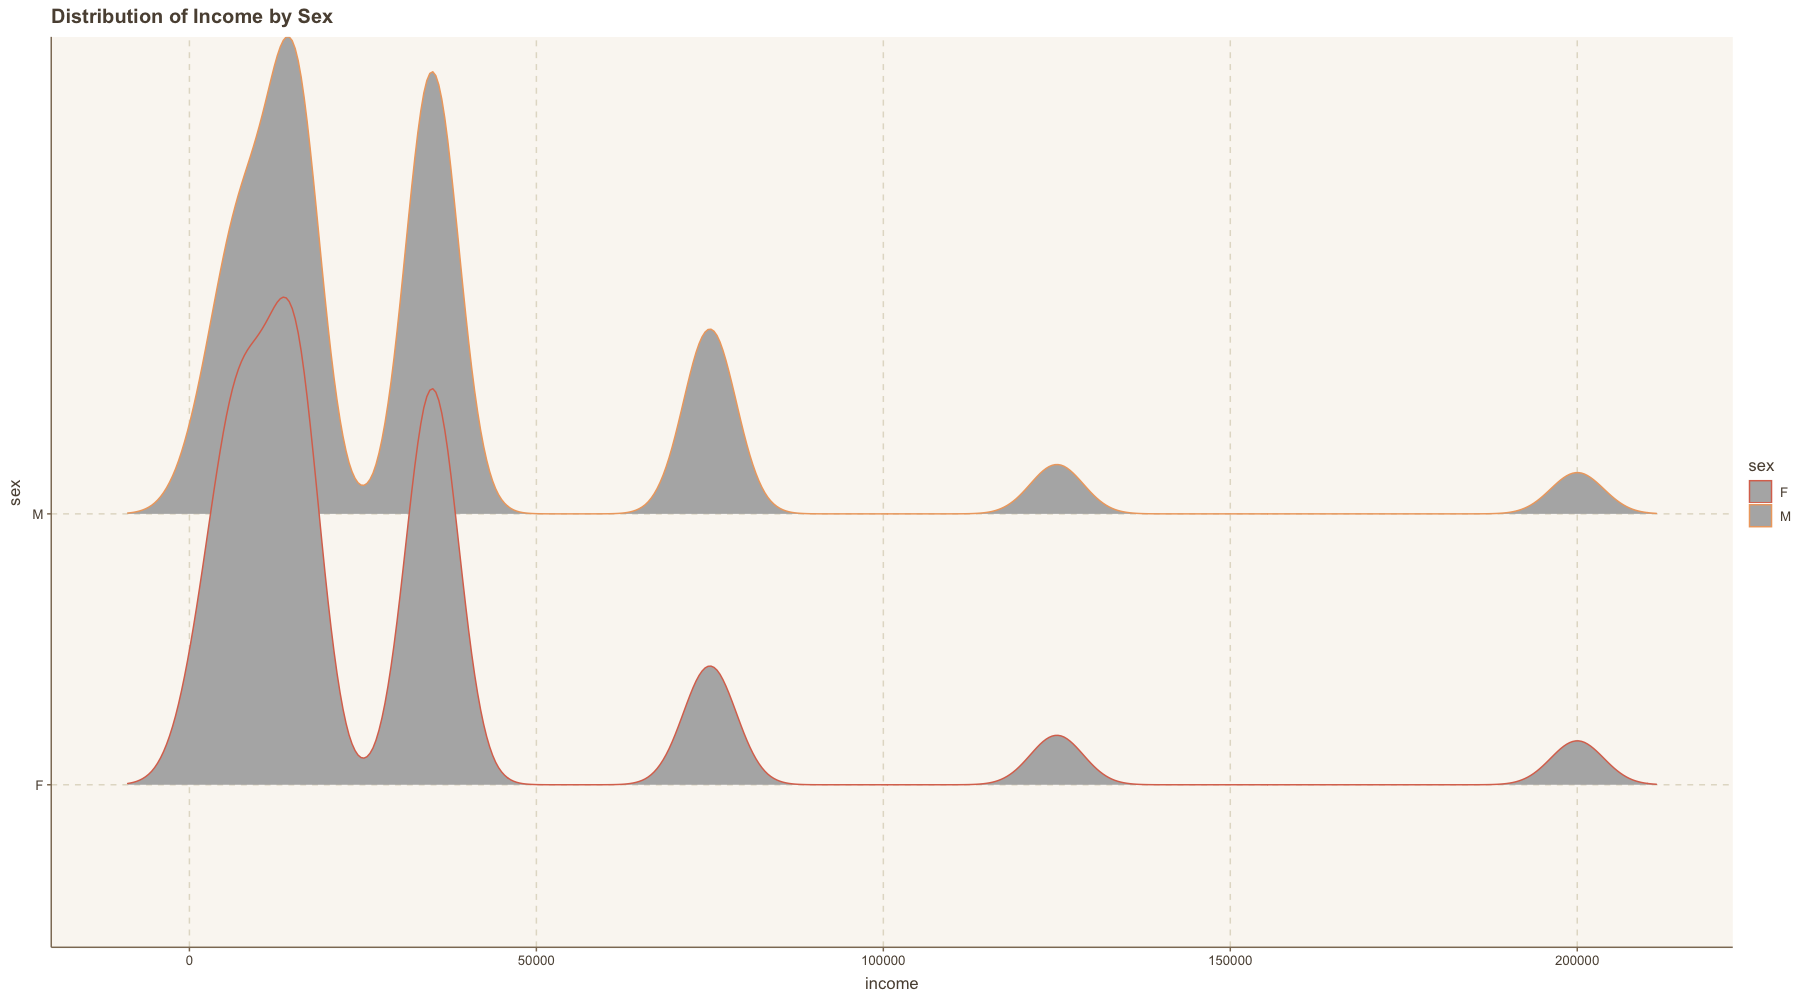

In [22]:
chile %>%
    ggplot( aes(x = income, y = sex, color = sex) ) +
    geom_density_ridges()  +
    ggtitle("Distribution of Income by Sex")  


An interesting observation here is that both sexes seem to have similar distributions in income across different income brackets. This makes the gender impact on income fairly balanced.

### Examining Relationship Across Variables

In the previous section, we relied on our intuition to guide us in exploring the relationships between variables. However, as the number of variables grows, it becomes increasingly challenging to manually identify patterns and correlations. This is where a correlation matrix can help, providing a comprehensive overview of the relationships between all numeric variables.

A correlation matrix is a powerful tool for visualizing the strength and direction of pairwise correlations between variables. By examining this matrix, we can quickly identify:

* Which variables are strongly correlated with each other
* Whether there are any anti-correlated pairs (i.e., as one variable increases, the other decreases)
* The overall structure of relationships between variables

The code snippet below implements a correlation matrix using pearson correlation. 

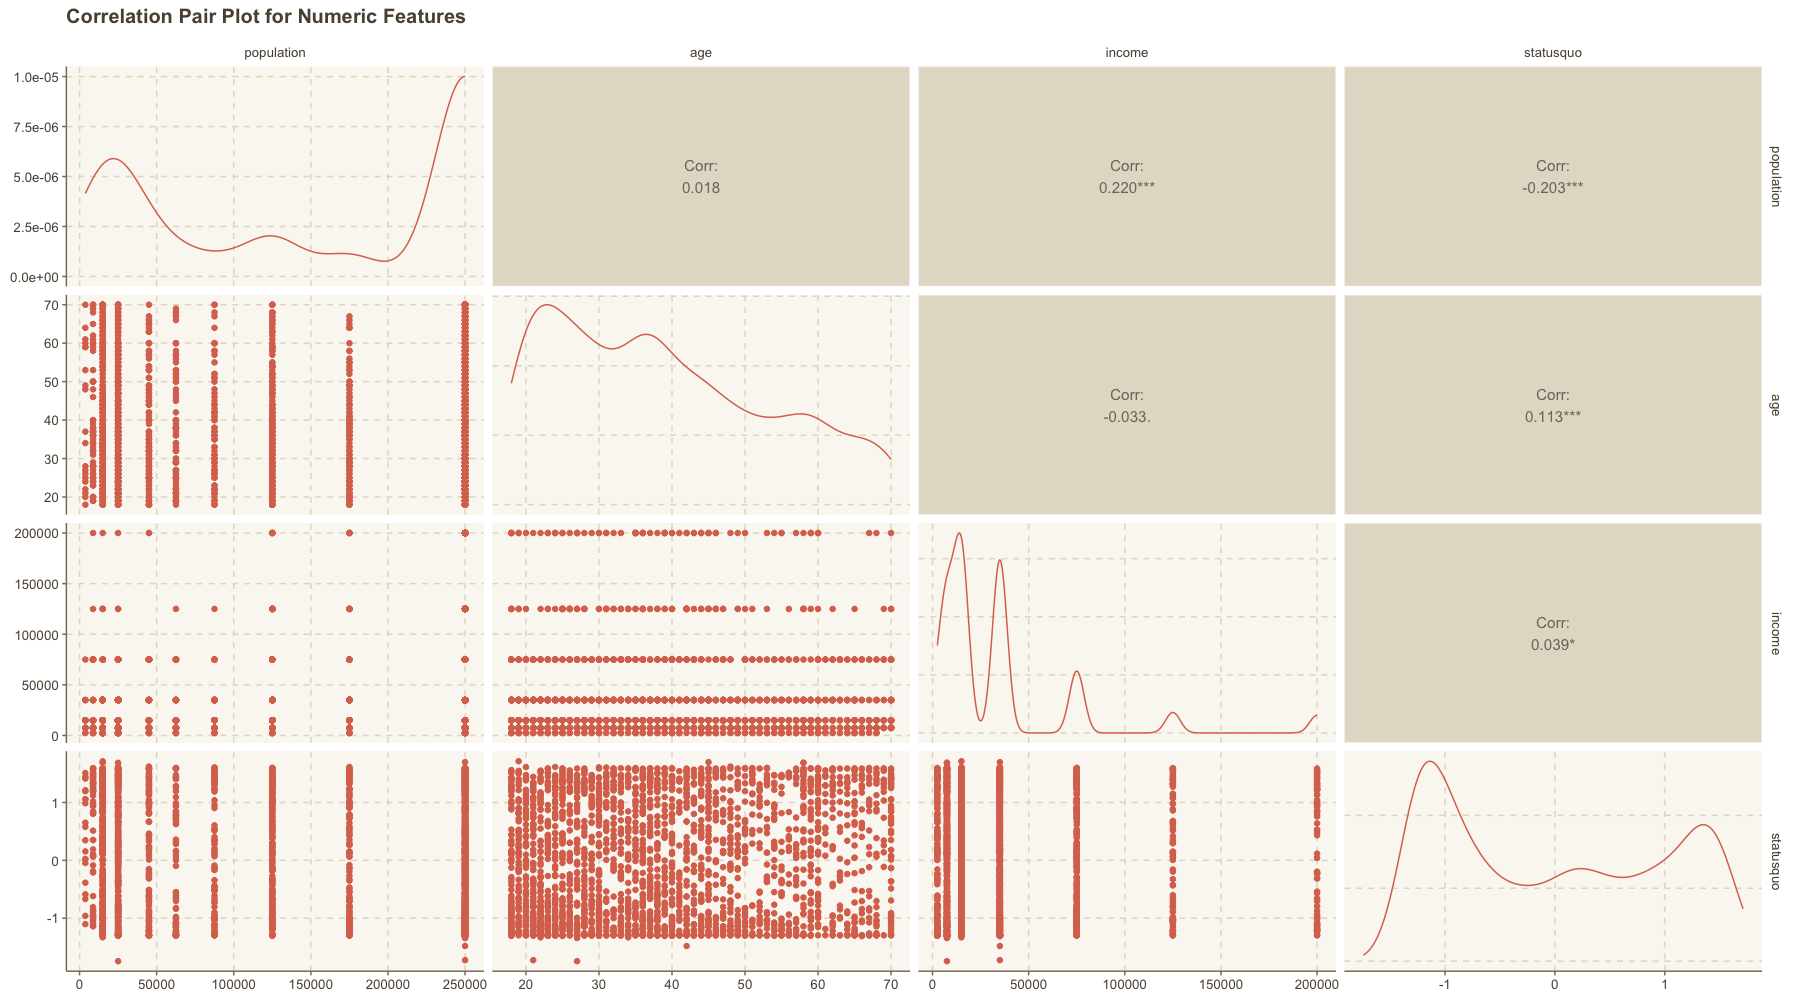

In [23]:
# install.packages("GGally")

chile %>% 
    select_if( ~ is.numeric(.)) %>% 
    drop_na() %>%                     # drops missing values
    ggpairs(., title = "Correlation Pair Plot for Numeric Features")

From the correlation matrix, we do not see any strong linear correlations between the numeric variables. We observe very week positive and negative correlations suggesting that the variables are linearly independent from each other.

### Imputing Missing Values

Earlier, we observed that some variables had missing values.  On this section, we use imputation techniques to fill the missing values. Let's first recall the missing values.

In [24]:
chile %>% summarise( across( everything(), ~ sum(is.na(.)))) 

region,population,sex,age,education,income,statusquo,vote
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,1,11,98,17,168


There are many ways to impute missing values. With this example, we will use K-Nearest Neighbor. This is driven by the fact that this is a survey data and we would expect similar responses from similar profiles. 

The code below demonstrates how to implement this. Specifically, we use $5$ nearest neighbors. It is important to notice that we provide a model formula within the recipe to determine which variables will be used for imputation. 

In [25]:
# generating knn_recipe
knn_recipe <- recipe( vote ~ ., data = chile ) %>%
                step_impute_knn( all_predictors(), neighbors = 5)

# preparing the knn_recipe
knn_recipe_prep <- prep(knn_recipe, chile)

# knn imputed values
knn_imputed_values <- bake(knn_recipe_prep, chile)

In [26]:
knn_imputed_values %>% summarise( across( everything(), ~ sum(is.na(.)))) 

region,population,sex,age,education,income,statusquo,vote
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,168


### Introducing Tidymodel for Prediction

So far, we have seen how to perform exploratory data and develop imputation techniques. With our dataset, we have not had to perform any significant data transformation beyond imputation. This is intentional for this lab, however, not that in many cases, it is expected to perform transformations on your dataset ahead of modelling.

On this section, we formally introduce `tidymodels`, a framework for modelling data in R that includes a collection of various packages and methods into an integrated workflow. For more details, you can visit https://www.tidymodels.org to learn more.

Let's use the example we have to build a classification model. We will again use K-NN which is a simple model to reduce complexity. 

Our implementation steps will include the following:

1. Split the data into training and testing
2. Develop a model object - define engine, specification and fit
3. Fit the model
4. Extract Model Results and Metrics

#### Splitting the data into training and testing set

We begin by splitting the data into a training set and test set using the rsamples package that is colled directly from tidymodels

In [27]:
#library(tidymodels)
#library(tidyverse)

chile_df <- knn_imputed_values %>% drop_na() # removes the observations with outcome 

## splitting the data into train and test
data_split <- initial_split( data = chile_df,  strata = vote, prop = .8 )

train_data <- training(data_split)
test_data <- testing(data_split)

dim(train_data); dim(test_data);

[1] 2025    8

[1] 507   8

### Model Definition

As noted earlier, we implement a classification model using KNN to predict the vote based on other features. Here, we make sure that we define both the mode and engine as `parsnip` calls other packages and engines to perform the modeling process.

In [29]:
knn_model <- nearest_neighbor( neighbors = 5) %>%
                set_mode("classification") %>%
                set_engine("kknn")
 
knn_model

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 5

Computational engine: kknn 


### Fitting the Model

Once the model object is defined, we can proceed to fit the model. While it's possible to combine these steps into a single operation, we are separating them here for clarity and to facilitate discussion.


In [30]:
# remember that you will need the kknn package to successfully run this
knn_fit <- knn_model %>% fit( vote ~ ., data = train_data )

knn_fit

Warning message:
"package 'kknn' was built under R version 4.3.3"


parsnip model object


Call:
kknn::train.kknn(formula = vote ~ ., data = data, ks = min_rows(5,     data, 5))

Type of response variable: nominal
Minimal misclassification: 0.4246914
Best kernel: optimal
Best k: 5

We can see that the model has run successfully. We can now move on to looking at the predictions and assessing the model performance. 

### Predictions and Model Assessment

To retrieve predictions, we use the `augment` function, which accepts a model object and a dataset as inputs. The example below demonstrates the predictions on the training set, displaying the first 10 rows for brevity. Notably, the prediction results include both the predicted class and the associated probabilities.

In [59]:
augment( knn_fit, new_data = train_data) %>% slice_head(n  = 10)

.pred_class,.pred_A,.pred_N,.pred_U,.pred_Y,region,population,sex,age,education,income,statusquo,vote
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<dbl>,<fct>
N,0.0000000,0.9729432,0.02705676,0.00000000,N,175000,F,23,S,35000,-1.10496,N
N,0.0000000,0.9729432,0.02705676,0.00000000,N,175000,F,28,P,7500,-1.04685,N
N,0.0000000,0.8372878,0.00000000,0.16271218,N,175000,M,26,PS,35000,-0.78626,N
N,0.0000000,1.0000000,0.00000000,0.00000000,N,175000,F,24,S,15000,-1.11348,N
N,0.0000000,1.0000000,0.00000000,0.00000000,N,175000,M,41,P,15000,-1.29617,N
N,0.0000000,1.0000000,0.00000000,0.00000000,N,175000,F,20,PS,15000,-0.85579,N
A,0.4580305,0.0000000,0.37925735,0.16271218,N,175000,F,43,P,16500,0.15489,A
N,0.0000000,0.9122352,0.00000000,0.08776483,N,175000,M,20,PS,35000,-0.89281,N
N,0.0000000,0.4580305,0.29149251,0.25047701,N,175000,M,44,PS,35000,1.16851,N


The same can be done for the `test_set`

In [31]:
augment( knn_fit, new_data = test_data) %>% slice_head(n  = 10)

.pred_class,.pred_A,.pred_N,.pred_U,.pred_Y,region,population,sex,age,education,income,statusquo,vote
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<dbl>,<fct>
Y,0.00000000,0.0000000,0.45803048,0.5419695,N,175000,M,64,P,15000,1.36566,Y
Y,0.00000000,0.0000000,0.00000000,1.0000000,N,175000,F,46,S,75000,1.50684,Y
Y,0.35220059,0.1897689,0.00000000,0.4580305,N,175000,M,30,S,35000,-0.90689,U
Y,0.00000000,0.0000000,0.00000000,1.0000000,N,175000,F,55,PS,35000,1.45602,Y
Y,0.02705676,0.0000000,0.45803048,0.5149128,N,175000,M,18,S,75000,1.54808,Y
Y,0.26443575,0.0000000,0.02705676,0.7085075,N,175000,F,28,S,35000,0.55328,U
Y,0.00000000,0.0000000,0.25047701,0.7495230,N,175000,F,43,P,16500,0.15489,A
U,0.00000000,0.0000000,0.54579531,0.4542047,N,175000,M,44,PS,35000,1.16851,N
A,0.57285207,0.0000000,0.00000000,0.4271479,N,175000,M,30,S,35000,0.26360,A


<br>

### Confusion Matrix for Classification

The confusion matrix can also be generated using the `conf_mat()` function, which takes the true labels and the predicted values as inputs.

In [32]:
augment( knn_fit, new_data = train_data) %>%
         conf_mat(truth = vote, estimate = .pred_class)

          Truth
Prediction   A   N   U   Y
         A  99   0   0   1
         N  24 687  35  13
         U   8  14 394  23
         Y  12  11  48 655

In [32]:
augment( knn_fit, new_data = test_data) %>%
         conf_mat(truth = vote, estimate = .pred_class)

          Truth
Prediction   A   N   U   Y
         A   2   6   4   7
         N  18 125  33   9
         U   8  30  41  35
         Y  11  15  38 125

### Additional Metrics

The confusion matrix provides a detailed, matrix-based view of model predictions, but it doesn’t distill this information into actionable performance metrics. To gain deeper insights into model performance, we implement additional classification metrics below, each offering a specific perspective on how well the model is performing.

In [33]:
augment( knn_fit, new_data = train_data ) %>% 
    summarise(
               accuracy = mean( .pred_class == vote),
               sensitivity = sens_vec(truth = vote, estimate = .pred_class),
               specificity = spec_vec(truth = vote, estimate = .pred_class),
               precision = precision_vec(truth = vote, estimate = .pred_class),
               recall = recall_vec(truth = vote, estimate = .pred_class),
               f1 = f_meas_vec(truth = vote, estimate = .pred_class)
)

accuracy,sensitivity,specificity,precision,recall,f1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9155556,0.8650502,0.9687645,0.9330879,0.8650502,0.8913602


In [34]:
augment( knn_fit, new_data = test_data ) %>% 
    summarise(
               accuracy = mean( .pred_class == vote),
               sensitivity = sens_vec(truth = vote, estimate = .pred_class),
               specificity = spec_vec(truth = vote, estimate = .pred_class),
               precision = precision_vec(truth = vote, estimate = .pred_class),
               recall = recall_vec(truth = vote, estimate = .pred_class),
               f1 = f_meas_vec(truth = vote, estimate = .pred_class)
)

accuracy,sensitivity,specificity,precision,recall,f1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5779093,0.4562962,0.850588,0.4504909,0.4562962,0.4507349


Our model's performance on both training and test sets, we notice a disparity, achieving high accuracy on the training data, however our model struggles on the test set. This discrepancy highlights the importance of evaluating models on unseen data to gauge their true generalizability.

In the coming session, we will discuss methods for improvement and further evaluation. As we proceed with our modeling endeavors, you'll notice that we will be leveraging `tidymodels` extensively. In fact, almost all future model development will utilize this flexible and efficient framework, allowing us to focus on more advanced topics in machine learning.


### References:

Exploratory Data Analysis Using R - Ronald K. Pearson. Chapter 3.

https://rpubs.com/StatsGary/tidymodels_from_scratch

https://www.tidymodels.org
